In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror{font-family:Consolas; font-size:15pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output{font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:15pt;}
div.prompt{min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_renderulli{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))


In [2]:
from tensorflow.keras.utils import to_categorical #분류분석시 원핫인코딩(추천)
import pandas as pd #원핫인코딩
from tensorflow.keras.models import Sequential, load_model #모델 생성, 모델 load
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 딥러닝 : 데이터의 규칙성을 추출
 - 응용분야 : 글짜인식, 문장분류, 예측, 질병진단, 얼굴인식
 - ML/DL의 종류
     * 지도학습(독립=입력변수, 타겟=종속변수)
         - 분류분석 (타겟변수가 category 변수인 분석, 다중분류 vs 이진분류) vs 회귀분석
     * 비지도학습
         - 군집화
     * 강화학습
    - 지도학습에서의 딥러닝 프로그래밍 방식
        * 1. 데이터 확보 및 생성
        * 2. 데이터 전처리: 스케일 조정, 훈련데이터셋(학습데이터셋),검증데이터셋,시험데이터셋
        * 3. 모델구성
        * 4. 모델 학습 과정 설정
        * 5. 모델 학습시키기 (훈련, 검증데이터셋)
        * 6. 모델 평가(시험데이터셋)
        * 7. 모델 저장/사용 (입력값 주어지면 예측값 받기)

## 데이터셋 생성

## 데이터 전처리

In [3]:
#학습데이터 = 훈련데이터셋
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)

#검증데이터 = 시험데이터셋
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])

In [4]:
# 인코딩 종류

data = np.array(['a','b','c','b','b'])
print('원데이터:', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨인코딩 된 데이터 : ', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('원핫인코딩 된 데이터 :\n', one_hot_encoding_data )

원데이터: ['a' 'b' 'c' 'b' 'b']
라벨인코딩 된 데이터 :  [0 1 2 1 1]
원핫인코딩 된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [5]:
#원핫인코딩(분류분석을 위한 target변수)
data = np.array([1,4,5,4,5])
categorical_onehot = to_categorical(data) #원핫인코딩 결과가 numpy 배열
print('to_categorical 이용 \n', categorical_onehot)
getdummies_onehot = pd.get_dummies(data) # 원핫인코딩 결과가 DataFrame
print('get_dummies 이용\n', getdummies_onehot)
print(type(categorical_onehot), type(getdummies_onehot))

to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies 이용
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [6]:
getdummies_onehot

,1,4,5
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [7]:
# 분류분석을 위한 target 변수 원핫인코딩
Y_train = to_categorical (y_train,19)
Y_val   = to_categorical (y_val)

In [8]:
x_train.shape, Y_train.shape, x_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

 ## 모델구성


In [9]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(38, activation='sigmoid')) #활성화 함수:relu, elu, tanh, sigmoid
model.add(Dense(64, activation = 'elu'))
model.add(Dense(32, activation='elu'))

model.add(Dense(19, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


## 모델 학습과정 설정
 - 회귀분석에서의 loss : mse, rmse, mae
 - 분류분석에서의 loss : categorical_crossentropy

In [10]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

## 모델 학습시키기

In [11]:
hist = model.fit(x_train, Y_train, epochs=300, batch_size=10,
                validation_data=(x_val, Y_val), verbose=2)
#verbose=0 : 출력 없음, 1: 기본값 출력, 2: epoch 별 자세한 로그 출력

Epoch 1/300
9/9 - 0s - loss: 2.7678 - accuracy: 0.1000 - val_loss: 2.5769 - val_accuracy: 0.1111 - 247ms/epoch - 27ms/step
Epoch 2/300
9/9 - 0s - loss: 2.4962 - accuracy: 0.0778 - val_loss: 2.3872 - val_accuracy: 0.1111 - 17ms/epoch - 2ms/step
Epoch 3/300
9/9 - 0s - loss: 2.3473 - accuracy: 0.0667 - val_loss: 2.2727 - val_accuracy: 0.1111 - 19ms/epoch - 2ms/step
Epoch 4/300
9/9 - 0s - loss: 2.2413 - accuracy: 0.0667 - val_loss: 2.1836 - val_accuracy: 0.2222 - 18ms/epoch - 2ms/step
Epoch 5/300
9/9 - 0s - loss: 2.1661 - accuracy: 0.1889 - val_loss: 2.1188 - val_accuracy: 0.2222 - 18ms/epoch - 2ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1064 - accuracy: 0.1889 - val_loss: 2.0646 - val_accuracy: 0.2222 - 20ms/epoch - 2ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0529 - accuracy: 0.2222 - val_loss: 2.0061 - val_accuracy: 0.2222 - 18ms/epoch - 2ms/step
Epoch 8/300
9/9 - 0s - loss: 1.9907 - accuracy: 0.2111 - val_loss: 1.9492 - val_accuracy: 0.2222 - 22ms/epoch - 2ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.3545 - accuracy: 1.0000 - val_loss: 0.3392 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 70/300
9/9 - 0s - loss: 0.3400 - accuracy: 1.0000 - val_loss: 0.3265 - val_accuracy: 1.0000 - 20ms/epoch - 2ms/step
Epoch 71/300
9/9 - 0s - loss: 0.3326 - accuracy: 0.9444 - val_loss: 0.3189 - val_accuracy: 1.0000 - 17ms/epoch - 2ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3202 - accuracy: 1.0000 - val_loss: 0.3074 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3094 - accuracy: 1.0000 - val_loss: 0.2986 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3014 - accuracy: 1.0000 - val_loss: 0.2881 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 75/300
9/9 - 0s - loss: 0.2969 - accuracy: 1.0000 - val_loss: 0.2802 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 76/300
9/9 - 0s - loss: 0.2933 - accuracy: 1.0000 - val_loss: 0.2729 - val_accuracy: 1.0000 - 19ms/epoch - 2ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.0385 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0384 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 1.0000 - 17ms/epoch - 2ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.0363 - val_accuracy: 1.0000 - 20ms/epoch - 2ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0372 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 1.0000 - 19ms/epoch - 2ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0369 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 1.0000 - 16ms/epoch - 2ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0350 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 1.0000 - 17ms/epoch - 2ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000 - 17ms/epoch - 2ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000 - 19ms/epoch - 2ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000 - 19ms/epoch - 2ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000 - 19ms/epoch - 2ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 20ms/epoch - 2ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 16ms/epoch - 2ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 19ms/epoch - 2ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000 - 17ms/epoch - 2ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000 - 20ms/epoch - 2ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - 14ms/epoch - 2ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - 17ms/epoch - 2ms/step
Epoch 278/300
9/

## 모델 평가하기 (모델 학습과정 살펴보고 evaluate)

In [12]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

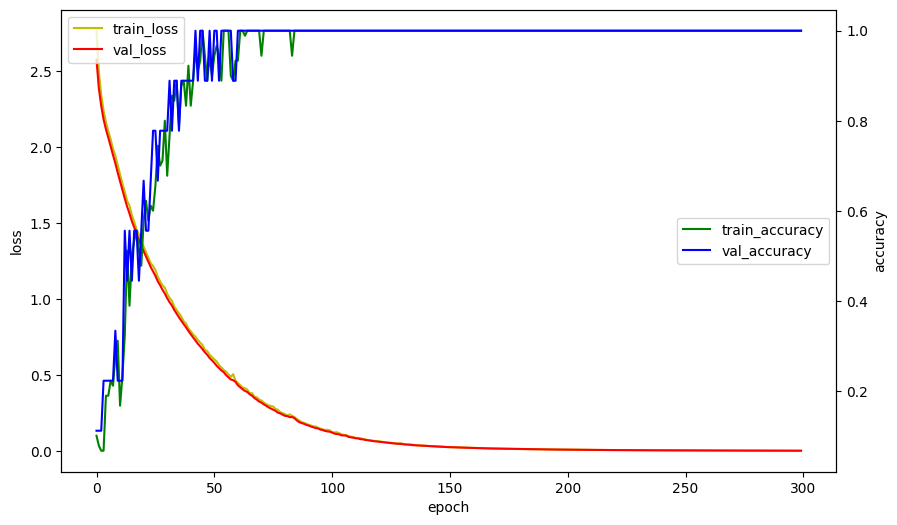

In [21]:
#학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [23]:
# 모델 평가하기(테스트데이터셋으로 모델 학습 설정과정의 loss, metrics)
score = model.evaluate(x_val, Y_val, batch_size=3)
print('loss :', score[0])
print('accuracy :', score[1])

3/3 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
loss : 0.002545824972912669
accuracy : 1.0


## 모델 사용하기(모델을 이용해서 예측하기)

In [26]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 12ms/step


4

In [27]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 12ms/step


4

In [28]:
# 몇 % 확률로 4라고 예측하는지
H[0,H.argmax()]*100

99.83454942703247

In [31]:
# 2,4,6의 확률
H[0, [2,4,6]]*100

array([7.8995548e-02, 9.9834549e+01, 8.6453214e-02], dtype=float32)

# 7 모델 저장

In [32]:
model.save('Model/02_deep.h5')

In [33]:
#저장된 모델 사용하기
model1 = load_model('Model/02_deep.h5')

In [36]:
model1.predict(np.array([[3]])).argmax()

1/1 [==============================] - 0s 12ms/step


6